In [1]:
import numpy as np
import math
from typing import List
import os
import argparse
import glob
import shutil
from torchvision import transforms
import torchvision.datasets as datasets
import torch.utils.data as loader
from torchvision import models
import torch
import torch.nn as nn
import time
import torch.optim as optim
from PIL import Image
import requests
import matplotlib.pyplot as plt


In [2]:
!tar -xvzf ./101_ObjectCategories.tar.gz # https://sagemaker-us-east-1-428881646170.s3.amazonaws.com/sagemaker/local-pytorch-example/caltech_data/101_ObjectCategories.tar.gz

x 101_ObjectCategories/
x 101_ObjectCategories/BACKGROUND_Google/
x 101_ObjectCategories/BACKGROUND_Google/tmp
x 101_ObjectCategories/BACKGROUND_Google/image_0004.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0005.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0006.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0007.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0008.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0010.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0011.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0012.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0013.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0014.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0016.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0017.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0002.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0018.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0019.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_00

x 101_ObjectCategories/BACKGROUND_Google/image_0259.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0260.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0261.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0262.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0263.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0265.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0266.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0267.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0268.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0269.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0271.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0272.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0273.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0274.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0275.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0277.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0278.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0

x 101_ObjectCategories/BACKGROUND_Google/image_0465.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0466.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0467.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0001.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0003.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0009.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0015.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0020.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0026.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0032.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0038.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0044.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0050.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0056.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0062.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0068.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0074.jpg
x 101_ObjectCategories/BACKGROUND_Google/image_0

x 101_ObjectCategories/Faces/image_0142.jpg
x 101_ObjectCategories/Faces/image_0143.jpg
x 101_ObjectCategories/Faces/image_0144.jpg
x 101_ObjectCategories/Faces/image_0145.jpg
x 101_ObjectCategories/Faces/image_0146.jpg
x 101_ObjectCategories/Faces/image_0148.jpg
x 101_ObjectCategories/Faces/image_0149.jpg
x 101_ObjectCategories/Faces/image_0150.jpg
x 101_ObjectCategories/Faces/image_0151.jpg
x 101_ObjectCategories/Faces/image_0152.jpg
x 101_ObjectCategories/Faces/image_0154.jpg
x 101_ObjectCategories/Faces/image_0155.jpg
x 101_ObjectCategories/Faces/image_0156.jpg
x 101_ObjectCategories/Faces/image_0157.jpg
x 101_ObjectCategories/Faces/image_0158.jpg
x 101_ObjectCategories/Faces/image_0160.jpg
x 101_ObjectCategories/Faces/image_0161.jpg
x 101_ObjectCategories/Faces/image_0162.jpg
x 101_ObjectCategories/Faces/image_0163.jpg
x 101_ObjectCategories/Faces/image_0164.jpg
x 101_ObjectCategories/Faces/image_0166.jpg
x 101_ObjectCategories/Faces/image_0167.jpg
x 101_ObjectCategories/Faces/ima

x 101_ObjectCategories/Faces/image_0425.jpg
x 101_ObjectCategories/Faces/image_0426.jpg
x 101_ObjectCategories/Faces/image_0427.jpg
x 101_ObjectCategories/Faces/image_0429.jpg
x 101_ObjectCategories/Faces/image_0430.jpg
x 101_ObjectCategories/Faces/image_0431.jpg
x 101_ObjectCategories/Faces/image_0432.jpg
x 101_ObjectCategories/Faces/image_0433.jpg
x 101_ObjectCategories/Faces/image_0435.jpg
x 101_ObjectCategories/Faces/image_0001.jpg
x 101_ObjectCategories/Faces/image_0002.jpg
x 101_ObjectCategories/Faces/image_0003.jpg
x 101_ObjectCategories/Faces/image_0009.jpg
x 101_ObjectCategories/Faces/image_0015.jpg
x 101_ObjectCategories/Faces/image_0021.jpg
x 101_ObjectCategories/Faces/image_0027.jpg
x 101_ObjectCategories/Faces/image_0033.jpg
x 101_ObjectCategories/Faces/image_0039.jpg
x 101_ObjectCategories/Faces/image_0045.jpg
x 101_ObjectCategories/Faces/image_0051.jpg
x 101_ObjectCategories/Faces/image_0057.jpg
x 101_ObjectCategories/Faces/image_0063.jpg
x 101_ObjectCategories/Faces/ima

x 101_ObjectCategories/Faces_easy/image_0219.jpg
x 101_ObjectCategories/Faces_easy/image_0220.jpg
x 101_ObjectCategories/Faces_easy/image_0221.jpg
x 101_ObjectCategories/Faces_easy/image_0222.jpg
x 101_ObjectCategories/Faces_easy/image_0223.jpg
x 101_ObjectCategories/Faces_easy/image_0225.jpg
x 101_ObjectCategories/Faces_easy/image_0226.jpg
x 101_ObjectCategories/Faces_easy/image_0227.jpg
x 101_ObjectCategories/Faces_easy/image_0228.jpg
x 101_ObjectCategories/Faces_easy/image_0229.jpg
x 101_ObjectCategories/Faces_easy/image_0231.jpg
x 101_ObjectCategories/Faces_easy/image_0232.jpg
x 101_ObjectCategories/Faces_easy/image_0233.jpg
x 101_ObjectCategories/Faces_easy/image_0234.jpg
x 101_ObjectCategories/Faces_easy/image_0235.jpg
x 101_ObjectCategories/Faces_easy/image_0237.jpg
x 101_ObjectCategories/Faces_easy/image_0238.jpg
x 101_ObjectCategories/Faces_easy/image_0239.jpg
x 101_ObjectCategories/Faces_easy/image_0240.jpg
x 101_ObjectCategories/Faces_easy/image_0241.jpg
x 101_ObjectCategori

x 101_ObjectCategories/Leopards/image_0103.jpg
x 101_ObjectCategories/Leopards/image_0104.jpg
x 101_ObjectCategories/Leopards/image_0106.jpg
x 101_ObjectCategories/Leopards/image_0107.jpg
x 101_ObjectCategories/Leopards/image_0108.jpg
x 101_ObjectCategories/Leopards/image_0109.jpg
x 101_ObjectCategories/Leopards/image_0110.jpg
x 101_ObjectCategories/Leopards/image_0112.jpg
x 101_ObjectCategories/Leopards/image_0113.jpg
x 101_ObjectCategories/Leopards/image_0114.jpg
x 101_ObjectCategories/Leopards/image_0115.jpg
x 101_ObjectCategories/Leopards/image_0116.jpg
x 101_ObjectCategories/Leopards/image_0118.jpg
x 101_ObjectCategories/Leopards/image_0119.jpg
x 101_ObjectCategories/Leopards/image_0120.jpg
x 101_ObjectCategories/Leopards/image_0121.jpg
x 101_ObjectCategories/Leopards/image_0122.jpg
x 101_ObjectCategories/Leopards/image_0124.jpg
x 101_ObjectCategories/Leopards/image_0125.jpg
x 101_ObjectCategories/Leopards/image_0126.jpg
x 101_ObjectCategories/Leopards/image_0127.jpg
x 101_ObjectC

x 101_ObjectCategories/Motorbikes/image_0098.jpg
x 101_ObjectCategories/Motorbikes/image_0100.jpg
x 101_ObjectCategories/Motorbikes/image_0101.jpg
x 101_ObjectCategories/Motorbikes/image_0102.jpg
x 101_ObjectCategories/Motorbikes/image_0103.jpg
x 101_ObjectCategories/Motorbikes/image_0104.jpg
x 101_ObjectCategories/Motorbikes/image_0106.jpg
x 101_ObjectCategories/Motorbikes/image_0107.jpg
x 101_ObjectCategories/Motorbikes/image_0108.jpg
x 101_ObjectCategories/Motorbikes/image_0109.jpg
x 101_ObjectCategories/Motorbikes/image_0110.jpg
x 101_ObjectCategories/Motorbikes/image_0112.jpg
x 101_ObjectCategories/Motorbikes/image_0113.jpg
x 101_ObjectCategories/Motorbikes/image_0114.jpg
x 101_ObjectCategories/Motorbikes/image_0115.jpg
x 101_ObjectCategories/Motorbikes/image_0116.jpg
x 101_ObjectCategories/Motorbikes/image_0118.jpg
x 101_ObjectCategories/Motorbikes/image_0119.jpg
x 101_ObjectCategories/Motorbikes/image_0120.jpg
x 101_ObjectCategories/Motorbikes/image_0121.jpg
x 101_ObjectCategori

x 101_ObjectCategories/Motorbikes/image_0309.jpg
x 101_ObjectCategories/Motorbikes/image_0310.jpg
x 101_ObjectCategories/Motorbikes/image_0311.jpg
x 101_ObjectCategories/Motorbikes/image_0312.jpg
x 101_ObjectCategories/Motorbikes/image_0313.jpg
x 101_ObjectCategories/Motorbikes/image_0315.jpg
x 101_ObjectCategories/Motorbikes/image_0316.jpg
x 101_ObjectCategories/Motorbikes/image_0317.jpg
x 101_ObjectCategories/Motorbikes/image_0318.jpg
x 101_ObjectCategories/Motorbikes/image_0319.jpg
x 101_ObjectCategories/Motorbikes/image_0321.jpg
x 101_ObjectCategories/Motorbikes/image_0322.jpg
x 101_ObjectCategories/Motorbikes/image_0323.jpg
x 101_ObjectCategories/Motorbikes/image_0324.jpg
x 101_ObjectCategories/Motorbikes/image_0325.jpg
x 101_ObjectCategories/Motorbikes/image_0327.jpg
x 101_ObjectCategories/Motorbikes/image_0328.jpg
x 101_ObjectCategories/Motorbikes/image_0329.jpg
x 101_ObjectCategories/Motorbikes/image_0330.jpg
x 101_ObjectCategories/Motorbikes/image_0331.jpg
x 101_ObjectCategori

x 101_ObjectCategories/Motorbikes/image_0714.jpg
x 101_ObjectCategories/Motorbikes/image_0715.jpg
x 101_ObjectCategories/Motorbikes/image_0717.jpg
x 101_ObjectCategories/Motorbikes/image_0718.jpg
x 101_ObjectCategories/Motorbikes/image_0719.jpg
x 101_ObjectCategories/Motorbikes/image_0720.jpg
x 101_ObjectCategories/Motorbikes/image_0721.jpg
x 101_ObjectCategories/Motorbikes/image_0723.jpg
x 101_ObjectCategories/Motorbikes/image_0724.jpg
x 101_ObjectCategories/Motorbikes/image_0725.jpg
x 101_ObjectCategories/Motorbikes/image_0726.jpg
x 101_ObjectCategories/Motorbikes/image_0727.jpg
x 101_ObjectCategories/Motorbikes/image_0729.jpg
x 101_ObjectCategories/Motorbikes/image_0730.jpg
x 101_ObjectCategories/Motorbikes/image_0731.jpg
x 101_ObjectCategories/Motorbikes/image_0732.jpg
x 101_ObjectCategories/Motorbikes/image_0733.jpg
x 101_ObjectCategories/Motorbikes/image_0735.jpg
x 101_ObjectCategories/Motorbikes/image_0736.jpg
x 101_ObjectCategories/Motorbikes/image_0737.jpg
x 101_ObjectCategori

x 101_ObjectCategories/Motorbikes/image_0674.jpg
x 101_ObjectCategories/Motorbikes/image_0680.jpg
x 101_ObjectCategories/Motorbikes/image_0686.jpg
x 101_ObjectCategories/Motorbikes/image_0692.jpg
x 101_ObjectCategories/Motorbikes/image_0698.jpg
x 101_ObjectCategories/Motorbikes/image_0704.jpg
x 101_ObjectCategories/Motorbikes/image_0710.jpg
x 101_ObjectCategories/Motorbikes/image_0716.jpg
x 101_ObjectCategories/Motorbikes/image_0722.jpg
x 101_ObjectCategories/Motorbikes/image_0728.jpg
x 101_ObjectCategories/Motorbikes/image_0734.jpg
x 101_ObjectCategories/Motorbikes/image_0740.jpg
x 101_ObjectCategories/Motorbikes/image_0746.jpg
x 101_ObjectCategories/Motorbikes/image_0752.jpg
x 101_ObjectCategories/Motorbikes/image_0758.jpg
x 101_ObjectCategories/Motorbikes/image_0764.jpg
x 101_ObjectCategories/Motorbikes/image_0770.jpg
x 101_ObjectCategories/Motorbikes/image_0776.jpg
x 101_ObjectCategories/Motorbikes/image_0782.jpg
x 101_ObjectCategories/Motorbikes/image_0788.jpg
x 101_ObjectCategori

x 101_ObjectCategories/airplanes/image_0297.jpg
x 101_ObjectCategories/airplanes/image_0298.jpg
x 101_ObjectCategories/airplanes/image_0299.jpg
x 101_ObjectCategories/airplanes/image_0300.jpg
x 101_ObjectCategories/airplanes/image_0301.jpg
x 101_ObjectCategories/airplanes/image_0303.jpg
x 101_ObjectCategories/airplanes/image_0304.jpg
x 101_ObjectCategories/airplanes/image_0305.jpg
x 101_ObjectCategories/airplanes/image_0306.jpg
x 101_ObjectCategories/airplanes/image_0307.jpg
x 101_ObjectCategories/airplanes/image_0309.jpg
x 101_ObjectCategories/airplanes/image_0310.jpg
x 101_ObjectCategories/airplanes/image_0311.jpg
x 101_ObjectCategories/airplanes/image_0312.jpg
x 101_ObjectCategories/airplanes/image_0313.jpg
x 101_ObjectCategories/airplanes/image_0315.jpg
x 101_ObjectCategories/airplanes/image_0316.jpg
x 101_ObjectCategories/airplanes/image_0317.jpg
x 101_ObjectCategories/airplanes/image_0318.jpg
x 101_ObjectCategories/airplanes/image_0319.jpg
x 101_ObjectCategories/airplanes/image_0

x 101_ObjectCategories/airplanes/image_0643.jpg
x 101_ObjectCategories/airplanes/image_0645.jpg
x 101_ObjectCategories/airplanes/image_0646.jpg
x 101_ObjectCategories/airplanes/image_0647.jpg
x 101_ObjectCategories/airplanes/image_0648.jpg
x 101_ObjectCategories/airplanes/image_0649.jpg
x 101_ObjectCategories/airplanes/image_0651.jpg
x 101_ObjectCategories/airplanes/image_0652.jpg
x 101_ObjectCategories/airplanes/image_0653.jpg
x 101_ObjectCategories/airplanes/image_0654.jpg
x 101_ObjectCategories/airplanes/image_0655.jpg
x 101_ObjectCategories/airplanes/image_0657.jpg
x 101_ObjectCategories/airplanes/image_0658.jpg
x 101_ObjectCategories/airplanes/image_0659.jpg
x 101_ObjectCategories/airplanes/image_0660.jpg
x 101_ObjectCategories/airplanes/image_0661.jpg
x 101_ObjectCategories/airplanes/image_0663.jpg
x 101_ObjectCategories/airplanes/image_0664.jpg
x 101_ObjectCategories/airplanes/image_0665.jpg
x 101_ObjectCategories/airplanes/image_0666.jpg
x 101_ObjectCategories/airplanes/image_0

x 101_ObjectCategories/ant/image_0026.jpg
x 101_ObjectCategories/ant/image_0028.jpg
x 101_ObjectCategories/ant/image_0029.jpg
x 101_ObjectCategories/ant/image_0030.jpg
x 101_ObjectCategories/ant/image_0031.jpg
x 101_ObjectCategories/ant/image_0032.jpg
x 101_ObjectCategories/ant/image_0034.jpg
x 101_ObjectCategories/ant/image_0035.jpg
x 101_ObjectCategories/ant/image_0036.jpg
x 101_ObjectCategories/ant/image_0037.jpg
x 101_ObjectCategories/ant/image_0038.jpg
x 101_ObjectCategories/ant/image_0040.jpg
x 101_ObjectCategories/ant/image_0041.jpg
x 101_ObjectCategories/ant/image_0042.jpg
x 101_ObjectCategories/ant/image_0001.jpg
x 101_ObjectCategories/ant/image_0002.jpg
x 101_ObjectCategories/ant/image_0003.jpg
x 101_ObjectCategories/ant/image_0009.jpg
x 101_ObjectCategories/ant/image_0015.jpg
x 101_ObjectCategories/ant/image_0021.jpg
x 101_ObjectCategories/ant/image_0027.jpg
x 101_ObjectCategories/ant/image_0033.jpg
x 101_ObjectCategories/ant/image_0039.jpg
x 101_ObjectCategories/barrel/
x 1

x 101_ObjectCategories/bonsai/image_0118.jpg
x 101_ObjectCategories/bonsai/image_0119.jpg
x 101_ObjectCategories/bonsai/image_0120.jpg
x 101_ObjectCategories/bonsai/image_0121.jpg
x 101_ObjectCategories/bonsai/image_0122.jpg
x 101_ObjectCategories/bonsai/image_0124.jpg
x 101_ObjectCategories/bonsai/image_0125.jpg
x 101_ObjectCategories/bonsai/image_0126.jpg
x 101_ObjectCategories/bonsai/image_0127.jpg
x 101_ObjectCategories/bonsai/image_0128.jpg
x 101_ObjectCategories/bonsai/image_0001.jpg
x 101_ObjectCategories/bonsai/image_0002.jpg
x 101_ObjectCategories/bonsai/image_0003.jpg
x 101_ObjectCategories/bonsai/image_0009.jpg
x 101_ObjectCategories/bonsai/image_0015.jpg
x 101_ObjectCategories/bonsai/image_0021.jpg
x 101_ObjectCategories/bonsai/image_0027.jpg
x 101_ObjectCategories/bonsai/image_0033.jpg
x 101_ObjectCategories/bonsai/image_0039.jpg
x 101_ObjectCategories/bonsai/image_0045.jpg
x 101_ObjectCategories/bonsai/image_0051.jpg
x 101_ObjectCategories/bonsai/image_0057.jpg
x 101_Obje

x 101_ObjectCategories/butterfly/image_0040.jpg
x 101_ObjectCategories/butterfly/image_0041.jpg
x 101_ObjectCategories/butterfly/image_0042.jpg
x 101_ObjectCategories/butterfly/image_0043.jpg
x 101_ObjectCategories/butterfly/image_0044.jpg
x 101_ObjectCategories/butterfly/image_0046.jpg
x 101_ObjectCategories/butterfly/image_0047.jpg
x 101_ObjectCategories/butterfly/image_0048.jpg
x 101_ObjectCategories/butterfly/image_0049.jpg
x 101_ObjectCategories/butterfly/image_0050.jpg
x 101_ObjectCategories/butterfly/image_0052.jpg
x 101_ObjectCategories/butterfly/image_0053.jpg
x 101_ObjectCategories/butterfly/image_0054.jpg
x 101_ObjectCategories/butterfly/image_0055.jpg
x 101_ObjectCategories/butterfly/image_0056.jpg
x 101_ObjectCategories/butterfly/image_0058.jpg
x 101_ObjectCategories/butterfly/image_0059.jpg
x 101_ObjectCategories/butterfly/image_0060.jpg
x 101_ObjectCategories/butterfly/image_0061.jpg
x 101_ObjectCategories/butterfly/image_0062.jpg
x 101_ObjectCategories/butterfly/image_0

x 101_ObjectCategories/ceiling_fan/image_0039.jpg
x 101_ObjectCategories/ceiling_fan/image_0045.jpg
x 101_ObjectCategories/cellphone/
x 101_ObjectCategories/cellphone/image_0004.jpg
x 101_ObjectCategories/cellphone/image_0005.jpg
x 101_ObjectCategories/cellphone/image_0006.jpg
x 101_ObjectCategories/cellphone/image_0007.jpg
x 101_ObjectCategories/cellphone/image_0008.jpg
x 101_ObjectCategories/cellphone/image_0010.jpg
x 101_ObjectCategories/cellphone/image_0011.jpg
x 101_ObjectCategories/cellphone/image_0012.jpg
x 101_ObjectCategories/cellphone/image_0013.jpg
x 101_ObjectCategories/cellphone/image_0014.jpg
x 101_ObjectCategories/cellphone/image_0016.jpg
x 101_ObjectCategories/cellphone/image_0017.jpg
x 101_ObjectCategories/cellphone/image_0018.jpg
x 101_ObjectCategories/cellphone/image_0019.jpg
x 101_ObjectCategories/cellphone/image_0020.jpg
x 101_ObjectCategories/cellphone/image_0022.jpg
x 101_ObjectCategories/cellphone/image_0023.jpg
x 101_ObjectCategories/cellphone/image_0024.jpg
x 

x 101_ObjectCategories/cougar_face/image_0066.jpg
x 101_ObjectCategories/cougar_face/image_0067.jpg
x 101_ObjectCategories/cougar_face/image_0068.jpg
x 101_ObjectCategories/cougar_face/image_0001.jpg
x 101_ObjectCategories/cougar_face/image_0002.jpg
x 101_ObjectCategories/cougar_face/image_0003.jpg
x 101_ObjectCategories/cougar_face/image_0009.jpg
x 101_ObjectCategories/cougar_face/image_0015.jpg
x 101_ObjectCategories/cougar_face/image_0021.jpg
x 101_ObjectCategories/cougar_face/image_0027.jpg
x 101_ObjectCategories/cougar_face/image_0033.jpg
x 101_ObjectCategories/cougar_face/image_0039.jpg
x 101_ObjectCategories/cougar_face/image_0045.jpg
x 101_ObjectCategories/cougar_face/image_0051.jpg
x 101_ObjectCategories/cougar_face/image_0057.jpg
x 101_ObjectCategories/cougar_face/image_0063.jpg
x 101_ObjectCategories/cougar_face/image_0069.jpg
x 101_ObjectCategories/crab/
x 101_ObjectCategories/crab/image_0004.jpg
x 101_ObjectCategories/crab/image_0005.jpg
x 101_ObjectCategories/crab/image_0

x 101_ObjectCategories/cup/image_0004.jpg
x 101_ObjectCategories/cup/image_0005.jpg
x 101_ObjectCategories/cup/image_0006.jpg
x 101_ObjectCategories/cup/image_0007.jpg
x 101_ObjectCategories/cup/image_0008.jpg
x 101_ObjectCategories/cup/image_0010.jpg
x 101_ObjectCategories/cup/image_0011.jpg
x 101_ObjectCategories/cup/image_0012.jpg
x 101_ObjectCategories/cup/image_0013.jpg
x 101_ObjectCategories/cup/image_0014.jpg
x 101_ObjectCategories/cup/image_0016.jpg
x 101_ObjectCategories/cup/image_0017.jpg
x 101_ObjectCategories/cup/image_0018.jpg
x 101_ObjectCategories/cup/image_0019.jpg
x 101_ObjectCategories/cup/image_0020.jpg
x 101_ObjectCategories/cup/image_0022.jpg
x 101_ObjectCategories/cup/image_0023.jpg
x 101_ObjectCategories/cup/image_0024.jpg
x 101_ObjectCategories/cup/image_0025.jpg
x 101_ObjectCategories/cup/image_0026.jpg
x 101_ObjectCategories/cup/image_0028.jpg
x 101_ObjectCategories/cup/image_0029.jpg
x 101_ObjectCategories/cup/image_0030.jpg
x 101_ObjectCategories/cup/image_0

x 101_ObjectCategories/electric_guitar/image_0023.jpg
x 101_ObjectCategories/electric_guitar/image_0024.jpg
x 101_ObjectCategories/electric_guitar/image_0025.jpg
x 101_ObjectCategories/electric_guitar/image_0026.jpg
x 101_ObjectCategories/electric_guitar/image_0028.jpg
x 101_ObjectCategories/electric_guitar/image_0029.jpg
x 101_ObjectCategories/electric_guitar/image_0030.jpg
x 101_ObjectCategories/electric_guitar/image_0031.jpg
x 101_ObjectCategories/electric_guitar/image_0032.jpg
x 101_ObjectCategories/electric_guitar/image_0034.jpg
x 101_ObjectCategories/electric_guitar/image_0035.jpg
x 101_ObjectCategories/electric_guitar/image_0036.jpg
x 101_ObjectCategories/electric_guitar/image_0037.jpg
x 101_ObjectCategories/electric_guitar/image_0038.jpg
x 101_ObjectCategories/electric_guitar/image_0040.jpg
x 101_ObjectCategories/electric_guitar/image_0041.jpg
x 101_ObjectCategories/electric_guitar/image_0042.jpg
x 101_ObjectCategories/electric_guitar/image_0043.jpg
x 101_ObjectCategories/elect

x 101_ObjectCategories/ewer/image_0003.jpg
x 101_ObjectCategories/ewer/image_0009.jpg
x 101_ObjectCategories/ewer/image_0015.jpg
x 101_ObjectCategories/ewer/image_0021.jpg
x 101_ObjectCategories/ewer/image_0027.jpg
x 101_ObjectCategories/ewer/image_0033.jpg
x 101_ObjectCategories/ewer/image_0039.jpg
x 101_ObjectCategories/ewer/image_0045.jpg
x 101_ObjectCategories/ewer/image_0051.jpg
x 101_ObjectCategories/ewer/image_0057.jpg
x 101_ObjectCategories/ewer/image_0063.jpg
x 101_ObjectCategories/ewer/image_0069.jpg
x 101_ObjectCategories/ewer/image_0075.jpg
x 101_ObjectCategories/ewer/image_0081.jpg
x 101_ObjectCategories/ferry/
x 101_ObjectCategories/ferry/image_0004.jpg
x 101_ObjectCategories/ferry/image_0005.jpg
x 101_ObjectCategories/ferry/image_0006.jpg
x 101_ObjectCategories/ferry/image_0007.jpg
x 101_ObjectCategories/ferry/image_0008.jpg
x 101_ObjectCategories/ferry/image_0010.jpg
x 101_ObjectCategories/ferry/image_0011.jpg
x 101_ObjectCategories/ferry/image_0012.jpg
x 101_ObjectCate

x 101_ObjectCategories/gramophone/image_0047.jpg
x 101_ObjectCategories/gramophone/image_0048.jpg
x 101_ObjectCategories/gramophone/image_0049.jpg
x 101_ObjectCategories/gramophone/image_0050.jpg
x 101_ObjectCategories/gramophone/image_0001.jpg
x 101_ObjectCategories/gramophone/image_0002.jpg
x 101_ObjectCategories/gramophone/image_0003.jpg
x 101_ObjectCategories/gramophone/image_0009.jpg
x 101_ObjectCategories/gramophone/image_0015.jpg
x 101_ObjectCategories/gramophone/image_0021.jpg
x 101_ObjectCategories/gramophone/image_0027.jpg
x 101_ObjectCategories/gramophone/image_0033.jpg
x 101_ObjectCategories/gramophone/image_0039.jpg
x 101_ObjectCategories/gramophone/image_0045.jpg
x 101_ObjectCategories/gramophone/image_0051.jpg
x 101_ObjectCategories/grand_piano/
x 101_ObjectCategories/grand_piano/image_0004.jpg
x 101_ObjectCategories/grand_piano/image_0005.jpg
x 101_ObjectCategories/grand_piano/image_0006.jpg
x 101_ObjectCategories/grand_piano/image_0007.jpg
x 101_ObjectCategories/grand_

x 101_ObjectCategories/hedgehog/image_0031.jpg
x 101_ObjectCategories/hedgehog/image_0032.jpg
x 101_ObjectCategories/hedgehog/image_0034.jpg
x 101_ObjectCategories/hedgehog/image_0035.jpg
x 101_ObjectCategories/hedgehog/image_0036.jpg
x 101_ObjectCategories/hedgehog/image_0037.jpg
x 101_ObjectCategories/hedgehog/image_0038.jpg
x 101_ObjectCategories/hedgehog/image_0040.jpg
x 101_ObjectCategories/hedgehog/image_0041.jpg
x 101_ObjectCategories/hedgehog/image_0042.jpg
x 101_ObjectCategories/hedgehog/image_0043.jpg
x 101_ObjectCategories/hedgehog/image_0044.jpg
x 101_ObjectCategories/hedgehog/image_0046.jpg
x 101_ObjectCategories/hedgehog/image_0047.jpg
x 101_ObjectCategories/hedgehog/image_0048.jpg
x 101_ObjectCategories/hedgehog/image_0049.jpg
x 101_ObjectCategories/hedgehog/image_0050.jpg
x 101_ObjectCategories/hedgehog/image_0052.jpg
x 101_ObjectCategories/hedgehog/image_0053.jpg
x 101_ObjectCategories/hedgehog/image_0054.jpg
x 101_ObjectCategories/hedgehog/image_0001.jpg
x 101_ObjectC

x 101_ObjectCategories/joshua_tree/image_0009.jpg
x 101_ObjectCategories/joshua_tree/image_0015.jpg
x 101_ObjectCategories/joshua_tree/image_0021.jpg
x 101_ObjectCategories/joshua_tree/image_0027.jpg
x 101_ObjectCategories/joshua_tree/image_0033.jpg
x 101_ObjectCategories/joshua_tree/image_0039.jpg
x 101_ObjectCategories/joshua_tree/image_0045.jpg
x 101_ObjectCategories/joshua_tree/image_0051.jpg
x 101_ObjectCategories/joshua_tree/image_0057.jpg
x 101_ObjectCategories/joshua_tree/image_0063.jpg
x 101_ObjectCategories/kangaroo/
x 101_ObjectCategories/kangaroo/image_0004.jpg
x 101_ObjectCategories/kangaroo/image_0005.jpg
x 101_ObjectCategories/kangaroo/image_0006.jpg
x 101_ObjectCategories/kangaroo/image_0007.jpg
x 101_ObjectCategories/kangaroo/image_0008.jpg
x 101_ObjectCategories/kangaroo/image_0010.jpg
x 101_ObjectCategories/kangaroo/image_0011.jpg
x 101_ObjectCategories/kangaroo/image_0012.jpg
x 101_ObjectCategories/kangaroo/image_0013.jpg
x 101_ObjectCategories/kangaroo/image_0014.j

x 101_ObjectCategories/laptop/image_0040.jpg
x 101_ObjectCategories/laptop/image_0041.jpg
x 101_ObjectCategories/laptop/image_0042.jpg
x 101_ObjectCategories/laptop/image_0043.jpg
x 101_ObjectCategories/laptop/image_0044.jpg
x 101_ObjectCategories/laptop/image_0046.jpg
x 101_ObjectCategories/laptop/image_0047.jpg
x 101_ObjectCategories/laptop/image_0048.jpg
x 101_ObjectCategories/laptop/image_0049.jpg
x 101_ObjectCategories/laptop/image_0050.jpg
x 101_ObjectCategories/laptop/image_0052.jpg
x 101_ObjectCategories/laptop/image_0053.jpg
x 101_ObjectCategories/laptop/image_0054.jpg
x 101_ObjectCategories/laptop/image_0055.jpg
x 101_ObjectCategories/laptop/image_0056.jpg
x 101_ObjectCategories/laptop/image_0058.jpg
x 101_ObjectCategories/laptop/image_0059.jpg
x 101_ObjectCategories/laptop/image_0060.jpg
x 101_ObjectCategories/laptop/image_0061.jpg
x 101_ObjectCategories/laptop/image_0062.jpg
x 101_ObjectCategories/laptop/image_0064.jpg
x 101_ObjectCategories/laptop/image_0065.jpg
x 101_Obje

x 101_ObjectCategories/mayfly/image_0018.jpg
x 101_ObjectCategories/mayfly/image_0019.jpg
x 101_ObjectCategories/mayfly/image_0020.jpg
x 101_ObjectCategories/mayfly/image_0022.jpg
x 101_ObjectCategories/mayfly/image_0023.jpg
x 101_ObjectCategories/mayfly/image_0024.jpg
x 101_ObjectCategories/mayfly/image_0025.jpg
x 101_ObjectCategories/mayfly/image_0026.jpg
x 101_ObjectCategories/mayfly/image_0028.jpg
x 101_ObjectCategories/mayfly/image_0029.jpg
x 101_ObjectCategories/mayfly/image_0030.jpg
x 101_ObjectCategories/mayfly/image_0031.jpg
x 101_ObjectCategories/mayfly/image_0032.jpg
x 101_ObjectCategories/mayfly/image_0034.jpg
x 101_ObjectCategories/mayfly/image_0035.jpg
x 101_ObjectCategories/mayfly/image_0036.jpg
x 101_ObjectCategories/mayfly/image_0037.jpg
x 101_ObjectCategories/mayfly/image_0038.jpg
x 101_ObjectCategories/mayfly/image_0040.jpg
x 101_ObjectCategories/mayfly/image_0001.jpg
x 101_ObjectCategories/mayfly/image_0002.jpg
x 101_ObjectCategories/mayfly/image_0003.jpg
x 101_Obje

x 101_ObjectCategories/nautilus/image_0033.jpg
x 101_ObjectCategories/nautilus/image_0039.jpg
x 101_ObjectCategories/nautilus/image_0045.jpg
x 101_ObjectCategories/nautilus/image_0051.jpg
x 101_ObjectCategories/octopus/
x 101_ObjectCategories/octopus/image_0004.jpg
x 101_ObjectCategories/octopus/image_0005.jpg
x 101_ObjectCategories/octopus/image_0006.jpg
x 101_ObjectCategories/octopus/image_0007.jpg
x 101_ObjectCategories/octopus/image_0008.jpg
x 101_ObjectCategories/octopus/image_0010.jpg
x 101_ObjectCategories/octopus/image_0011.jpg
x 101_ObjectCategories/octopus/image_0012.jpg
x 101_ObjectCategories/octopus/image_0013.jpg
x 101_ObjectCategories/octopus/image_0014.jpg
x 101_ObjectCategories/octopus/image_0016.jpg
x 101_ObjectCategories/octopus/image_0017.jpg
x 101_ObjectCategories/octopus/image_0018.jpg
x 101_ObjectCategories/octopus/image_0019.jpg
x 101_ObjectCategories/octopus/image_0020.jpg
x 101_ObjectCategories/octopus/image_0022.jpg
x 101_ObjectCategories/octopus/image_0023.jp

x 101_ObjectCategories/pizza/image_0036.jpg
x 101_ObjectCategories/pizza/image_0037.jpg
x 101_ObjectCategories/pizza/image_0038.jpg
x 101_ObjectCategories/pizza/image_0040.jpg
x 101_ObjectCategories/pizza/image_0041.jpg
x 101_ObjectCategories/pizza/image_0042.jpg
x 101_ObjectCategories/pizza/image_0043.jpg
x 101_ObjectCategories/pizza/image_0044.jpg
x 101_ObjectCategories/pizza/image_0046.jpg
x 101_ObjectCategories/pizza/image_0047.jpg
x 101_ObjectCategories/pizza/image_0048.jpg
x 101_ObjectCategories/pizza/image_0049.jpg
x 101_ObjectCategories/pizza/image_0050.jpg
x 101_ObjectCategories/pizza/image_0052.jpg
x 101_ObjectCategories/pizza/image_0053.jpg
x 101_ObjectCategories/pizza/image_0001.jpg
x 101_ObjectCategories/pizza/image_0002.jpg
x 101_ObjectCategories/pizza/image_0003.jpg
x 101_ObjectCategories/pizza/image_0009.jpg
x 101_ObjectCategories/pizza/image_0015.jpg
x 101_ObjectCategories/pizza/image_0021.jpg
x 101_ObjectCategories/pizza/image_0027.jpg
x 101_ObjectCategories/pizza/ima

x 101_ObjectCategories/rooster/image_0002.jpg
x 101_ObjectCategories/rooster/image_0003.jpg
x 101_ObjectCategories/rooster/image_0009.jpg
x 101_ObjectCategories/rooster/image_0015.jpg
x 101_ObjectCategories/rooster/image_0021.jpg
x 101_ObjectCategories/rooster/image_0027.jpg
x 101_ObjectCategories/rooster/image_0033.jpg
x 101_ObjectCategories/rooster/image_0039.jpg
x 101_ObjectCategories/rooster/image_0045.jpg
x 101_ObjectCategories/saxophone/
x 101_ObjectCategories/saxophone/image_0004.jpg
x 101_ObjectCategories/saxophone/image_0005.jpg
x 101_ObjectCategories/saxophone/image_0006.jpg
x 101_ObjectCategories/saxophone/image_0007.jpg
x 101_ObjectCategories/saxophone/image_0008.jpg
x 101_ObjectCategories/saxophone/image_0010.jpg
x 101_ObjectCategories/saxophone/image_0011.jpg
x 101_ObjectCategories/saxophone/image_0012.jpg
x 101_ObjectCategories/saxophone/image_0013.jpg
x 101_ObjectCategories/saxophone/image_0014.jpg
x 101_ObjectCategories/saxophone/image_0016.jpg
x 101_ObjectCategories/s

x 101_ObjectCategories/snoopy/image_0018.jpg
x 101_ObjectCategories/snoopy/image_0019.jpg
x 101_ObjectCategories/snoopy/image_0020.jpg
x 101_ObjectCategories/snoopy/image_0022.jpg
x 101_ObjectCategories/snoopy/image_0023.jpg
x 101_ObjectCategories/snoopy/image_0024.jpg
x 101_ObjectCategories/snoopy/image_0025.jpg
x 101_ObjectCategories/snoopy/image_0026.jpg
x 101_ObjectCategories/snoopy/image_0028.jpg
x 101_ObjectCategories/snoopy/image_0029.jpg
x 101_ObjectCategories/snoopy/image_0030.jpg
x 101_ObjectCategories/snoopy/image_0031.jpg
x 101_ObjectCategories/snoopy/image_0032.jpg
x 101_ObjectCategories/snoopy/image_0034.jpg
x 101_ObjectCategories/snoopy/image_0035.jpg
x 101_ObjectCategories/snoopy/image_0001.jpg
x 101_ObjectCategories/snoopy/image_0002.jpg
x 101_ObjectCategories/snoopy/image_0003.jpg
x 101_ObjectCategories/snoopy/image_0009.jpg
x 101_ObjectCategories/snoopy/image_0015.jpg
x 101_ObjectCategories/snoopy/image_0021.jpg
x 101_ObjectCategories/snoopy/image_0027.jpg
x 101_Obje

x 101_ObjectCategories/stegosaurus/image_0031.jpg
x 101_ObjectCategories/stegosaurus/image_0032.jpg
x 101_ObjectCategories/stegosaurus/image_0034.jpg
x 101_ObjectCategories/stegosaurus/image_0035.jpg
x 101_ObjectCategories/stegosaurus/image_0036.jpg
x 101_ObjectCategories/stegosaurus/image_0037.jpg
x 101_ObjectCategories/stegosaurus/image_0038.jpg
x 101_ObjectCategories/stegosaurus/image_0040.jpg
x 101_ObjectCategories/stegosaurus/image_0041.jpg
x 101_ObjectCategories/stegosaurus/image_0042.jpg
x 101_ObjectCategories/stegosaurus/image_0043.jpg
x 101_ObjectCategories/stegosaurus/image_0044.jpg
x 101_ObjectCategories/stegosaurus/image_0046.jpg
x 101_ObjectCategories/stegosaurus/image_0047.jpg
x 101_ObjectCategories/stegosaurus/image_0048.jpg
x 101_ObjectCategories/stegosaurus/image_0049.jpg
x 101_ObjectCategories/stegosaurus/image_0050.jpg
x 101_ObjectCategories/stegosaurus/image_0052.jpg
x 101_ObjectCategories/stegosaurus/image_0053.jpg
x 101_ObjectCategories/stegosaurus/image_0054.jpg


x 101_ObjectCategories/sunflower/image_0057.jpg
x 101_ObjectCategories/sunflower/image_0063.jpg
x 101_ObjectCategories/sunflower/image_0069.jpg
x 101_ObjectCategories/sunflower/image_0075.jpg
x 101_ObjectCategories/sunflower/image_0081.jpg
x 101_ObjectCategories/tick/
x 101_ObjectCategories/tick/image_0004.jpg
x 101_ObjectCategories/tick/image_0005.jpg
x 101_ObjectCategories/tick/image_0006.jpg
x 101_ObjectCategories/tick/image_0007.jpg
x 101_ObjectCategories/tick/image_0008.jpg
x 101_ObjectCategories/tick/image_0010.jpg
x 101_ObjectCategories/tick/image_0011.jpg
x 101_ObjectCategories/tick/image_0012.jpg
x 101_ObjectCategories/tick/image_0013.jpg
x 101_ObjectCategories/tick/image_0014.jpg
x 101_ObjectCategories/tick/image_0016.jpg
x 101_ObjectCategories/tick/image_0017.jpg
x 101_ObjectCategories/tick/image_0018.jpg
x 101_ObjectCategories/tick/image_0019.jpg
x 101_ObjectCategories/tick/image_0020.jpg
x 101_ObjectCategories/tick/image_0022.jpg
x 101_ObjectCategories/tick/image_0023.jpg


x 101_ObjectCategories/umbrella/image_0072.jpg
x 101_ObjectCategories/umbrella/image_0073.jpg
x 101_ObjectCategories/umbrella/image_0074.jpg
x 101_ObjectCategories/umbrella/image_0001.jpg
x 101_ObjectCategories/umbrella/image_0002.jpg
x 101_ObjectCategories/umbrella/image_0003.jpg
x 101_ObjectCategories/umbrella/image_0009.jpg
x 101_ObjectCategories/umbrella/image_0015.jpg
x 101_ObjectCategories/umbrella/image_0021.jpg
x 101_ObjectCategories/umbrella/image_0027.jpg
x 101_ObjectCategories/umbrella/image_0033.jpg
x 101_ObjectCategories/umbrella/image_0039.jpg
x 101_ObjectCategories/umbrella/image_0045.jpg
x 101_ObjectCategories/umbrella/image_0051.jpg
x 101_ObjectCategories/umbrella/image_0057.jpg
x 101_ObjectCategories/umbrella/image_0063.jpg
x 101_ObjectCategories/umbrella/image_0069.jpg
x 101_ObjectCategories/umbrella/image_0075.jpg
x 101_ObjectCategories/watch/
x 101_ObjectCategories/watch/image_0004.jpg
x 101_ObjectCategories/watch/image_0005.jpg
x 101_ObjectCategories/watch/image_0

x 101_ObjectCategories/watch/image_0233.jpg
x 101_ObjectCategories/watch/image_0234.jpg
x 101_ObjectCategories/watch/image_0235.jpg
x 101_ObjectCategories/watch/image_0237.jpg
x 101_ObjectCategories/watch/image_0238.jpg
x 101_ObjectCategories/watch/image_0239.jpg
x 101_ObjectCategories/watch/image_0001.jpg
x 101_ObjectCategories/watch/image_0002.jpg
x 101_ObjectCategories/watch/image_0003.jpg
x 101_ObjectCategories/watch/image_0009.jpg
x 101_ObjectCategories/watch/image_0015.jpg
x 101_ObjectCategories/watch/image_0021.jpg
x 101_ObjectCategories/watch/image_0027.jpg
x 101_ObjectCategories/watch/image_0033.jpg
x 101_ObjectCategories/watch/image_0039.jpg
x 101_ObjectCategories/watch/image_0045.jpg
x 101_ObjectCategories/watch/image_0051.jpg
x 101_ObjectCategories/watch/image_0057.jpg
x 101_ObjectCategories/watch/image_0063.jpg
x 101_ObjectCategories/watch/image_0069.jpg
x 101_ObjectCategories/watch/image_0075.jpg
x 101_ObjectCategories/watch/image_0081.jpg
x 101_ObjectCategories/watch/ima

x 101_ObjectCategories/wrench/image_0006.jpg
x 101_ObjectCategories/wrench/image_0007.jpg
x 101_ObjectCategories/wrench/image_0008.jpg
x 101_ObjectCategories/wrench/image_0010.jpg
x 101_ObjectCategories/wrench/image_0011.jpg
x 101_ObjectCategories/wrench/image_0012.jpg
x 101_ObjectCategories/wrench/image_0013.jpg
x 101_ObjectCategories/wrench/image_0014.jpg
x 101_ObjectCategories/wrench/image_0016.jpg
x 101_ObjectCategories/wrench/image_0017.jpg
x 101_ObjectCategories/wrench/image_0018.jpg
x 101_ObjectCategories/wrench/image_0019.jpg
x 101_ObjectCategories/wrench/image_0020.jpg
x 101_ObjectCategories/wrench/image_0022.jpg
x 101_ObjectCategories/wrench/image_0023.jpg
x 101_ObjectCategories/wrench/image_0024.jpg
x 101_ObjectCategories/wrench/image_0025.jpg
x 101_ObjectCategories/wrench/image_0026.jpg
x 101_ObjectCategories/wrench/image_0028.jpg
x 101_ObjectCategories/wrench/image_0029.jpg
x 101_ObjectCategories/wrench/image_0030.jpg
x 101_ObjectCategories/wrench/image_0031.jpg
x 101_Obje

In [3]:

# Get all files in the current directory
def list_files(path):
    files = os.listdir(path)
    return np.asarray(files)

def split_files(oldpath, newpath, classes):
    for name in classes:
        full_dir = os.path.join(os.getcwd(), f"{oldpath}/{name}")

        files = list_files(full_dir)
        total_file = np.size(files,0)
        # We split data set into 3: train, validation and test
        
        train_size = math.ceil(total_file * 3/4) # 75% for training 

        validation_size = train_size + math.ceil(total_file * 1/8) # 12.5% for validation
        test_size = validation_size + math.ceil(total_file * 1/8) # 12.5x% for testing 
        
        train = files[0:train_size]
        validation = files[train_size:validation_size]
        test = files[validation_size:]

        move_files(train, full_dir, f"train/{name}")
        move_files(validation, full_dir, f"validation/{name}")
        move_files(test, full_dir, f"test/{name}")

def move_files(files, old_dir, new_dir):
    new_dir = os.path.join(os.getcwd(), new_dir);
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)

    for file in np.nditer(files):
        old_file_path = os.path.join(os.getcwd(), f"{old_dir}/{file}")
        new_file_path = os.path.join(os.getcwd(), f"{new_dir}/{file}")

        shutil.move(old_file_path, new_file_path)


In [4]:
newpath ='./'
classes = ['Leopards', 'airplanes', 'butterfly', 'camera', 'elephant', 'lamp', 'watch', 'umbrella', 'rhino'];

split_files('101_ObjectCategories', './', classes)

In [5]:

image_transforms = {
    'train': transforms.Compose([
              transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
              transforms.RandomRotation(degrees=15),
              transforms.RandomHorizontalFlip(),
              transforms.CenterCrop(size=224),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
             transforms.Resize(size=256),
             transforms.CenterCrop(size=224),
             transforms.ToTensor(),
             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])              
    ]),
    'test': transforms.Compose([
             transforms.Resize(size=256),
             transforms.CenterCrop(size=224),
             transforms.ToTensor(),
             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])              
    ])
}

In [6]:
# Create iterator for the data loader using DataLoader module

batch_size = 10

data = {
    'train': datasets.ImageFolder(root='./train', transform=image_transforms['train']),
    'validation': datasets.ImageFolder(root='./validation',transform=image_transforms['validation']),
    'test': datasets.ImageFolder(root='./test', transform=image_transforms['test'])
}


In [7]:
train_data = loader.DataLoader(data['train'], batch_size=batch_size, shuffle=True)
validation_data = loader.DataLoader(data['validation'], batch_size=batch_size, shuffle=True)
test_data = loader.DataLoader(data['test'], batch_size=batch_size, shuffle=True)

# Get size of data to be used for calculating loss

train_data_size = len(data['train'])
validation_data_size = len(data['validation'])
test_data_size =  len(data['test'])

In [8]:
train_data_size, validation_data_size, test_data_size

(1233, 208, 198)

In [9]:
model = models.resnet50(pretrained=True)

In [10]:
# Change the final layer of ResNet50 Model for Transfer Learning
for param in model.parameters():
  param.requires_grad = False
 
fc_inputs = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 2048),
    nn.ReLU(inplace=True),
    nn.Linear(2048, 10),
    nn.Dropout(0.4),
    nn.LogSoftmax(dim=1)
)


In [11]:
# Convert model to be used on GPU in cuda is available
if(torch.cuda.is_available()):
    model = model.to("cuda")

In [12]:
# Define Optimizer and Loss function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [13]:
# Calculate loss and accuracy
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
  
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  start = time.time()
  history = []
  best_acc = 0.0

  for epoch in range(epochs):
    epoch_start = time.time()
    print(f'Epoch : {epoch+1}/{epochs}')

    model.train()

    train_loss = 0.0 
    train_acc = 0.0

    valid_loss = 0.0
    valid_acc  = 0.0

    for i, (inputs, labels) in enumerate(train_data):

      inputs = inputs.to(device)
      labels = labels.to(device)

      # Clean existing gradients

      optimizer.zero_grad()

      # Forward pass - compute outputs on input data using the model
      outputs = model(inputs)

      # Compute loss
      loss = loss_criterion(outputs, labels)

      # Backpropagate the gradients

      loss.backward()

      # Update the parameters
      optimizer.step()

      # Compute the total loss for the batch and it to train_loss

      train_loss += loss.item() * inputs.size(0)

      # Compute the accuracy

      ret, predictions = torch.max(outputs.data,1)
      correct_counts = predictions.eq(labels.data.view_as(predictions))

      # Convert correct_counts to float and then compute the mean

      acc = torch.mean(correct_counts.type(torch.FloatTensor))

      # Compute total accuracy in the whole batch and add to train_acc

      train_acc += acc.item() * inputs.size(0)

      print(f'Batch number: {i}, Training: Loss: {loss.item()}, Accuracy: {acc.item()}')

    with torch.no_grad():
      
      model.eval()

      for j, (inputs, labels) in enumerate(validation_data):
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass - compute outputs on input data using the model
        outputs = model(inputs)

        # Compute loss
        loss = loss_criterion(outputs, labels)

        # Compute the total loss for  the batch and add it to valid_loss

        valid_loss += loss.item() * inputs.size(0)
        
        # Calculate validation accuracy

        ret, predictions = torch.max(outputs.data, 1)
        correct_prediction_counts = predictions.eq(labels.data.view_as(predictions))

        # Convert correct_prediction_counts to float and then compute the mean

        acc = torch.mean(correct_prediction_counts.type(torch.FloatTensor))

        # Compute total accuracy in the whole batch and add to valid_acc

        valid_acc +=acc.item() * inputs.size(0)
      

      avg_train_loss = train_loss/train_data_size
      avg_train_acc = train_acc/train_data_size

      avg_valid_loss = valid_loss/validation_data_size
      avg_valid_acc = valid_acc/validation_data_size

      history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

      epoch_end = time.time()
    
      print(f'Epoch : {epoch}, Training: Loss: f{avg_train_loss}, Accuracy: {avg_train_acc*100}%, \n\t\tValidation : Loss : {avg_valid_loss}, Accuracy: {avg_valid_acc*100}%, Time: {epoch_end-epoch_start}s')
      
      # Save if the model has best accuracy till now

      torch.save(model.state_dict(), f'model_{epoch}.pth')
    
    return model, history

In [14]:
num_epochs = 100
trained_model, history = train_and_validate(model, loss_func, optimizer, num_epochs)

Epoch : 1/100


/Users/user/anaconda3/envs/py38_xgb120/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Batch number: 0, Training: Loss: 2.279421091079712, Accuracy: 0.10000000149011612
Batch number: 1, Training: Loss: 5.335478782653809, Accuracy: 0.10000000149011612
Batch number: 2, Training: Loss: 3.6411404609680176, Accuracy: 0.30000001192092896
Batch number: 3, Training: Loss: 3.250115156173706, Accuracy: 0.30000001192092896
Batch number: 4, Training: Loss: 5.041467189788818, Accuracy: 0.0
Batch number: 5, Training: Loss: 2.9437451362609863, Accuracy: 0.10000000149011612
Batch number: 6, Training: Loss: 1.9425016641616821, Accuracy: 0.30000001192092896
Batch number: 7, Training: Loss: 1.5690734386444092, Accuracy: 0.6000000238418579
Batch number: 8, Training: Loss: 2.0909781455993652, Accuracy: 0.6000000238418579
Batch number: 9, Training: Loss: 2.1038994789123535, Accuracy: 0.5
Batch number: 10, Training: Loss: 2.3077356815338135, Accuracy: 0.5
Batch number: 11, Training: Loss: 1.3828715085983276, Accuracy: 0.6000000238418579
Batch number: 12, Training: Loss: 1.243255853652954, Accu

Batch number: 103, Training: Loss: 1.6752643585205078, Accuracy: 0.30000001192092896
Batch number: 104, Training: Loss: 0.798997163772583, Accuracy: 0.8999999761581421
Batch number: 105, Training: Loss: 1.153204083442688, Accuracy: 0.699999988079071
Batch number: 106, Training: Loss: 0.967093825340271, Accuracy: 0.5
Batch number: 107, Training: Loss: 0.382976233959198, Accuracy: 1.0
Batch number: 108, Training: Loss: 1.1650418043136597, Accuracy: 0.699999988079071
Batch number: 109, Training: Loss: 1.307873010635376, Accuracy: 0.4000000059604645
Batch number: 110, Training: Loss: 0.8423827886581421, Accuracy: 0.6000000238418579
Batch number: 111, Training: Loss: 0.6835311651229858, Accuracy: 0.699999988079071
Batch number: 112, Training: Loss: 1.103100299835205, Accuracy: 0.6000000238418579
Batch number: 113, Training: Loss: 0.42770376801490784, Accuracy: 0.800000011920929
Batch number: 114, Training: Loss: 0.5608149170875549, Accuracy: 0.800000011920929
Batch number: 115, Training: Lo

In [15]:

def computeModelAccuracy(model, loss_criterion):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  
  test_acc = 0.0
  test_loss = 0.0

  with torch.no_grad():

    # Set to evaluation mode
    model.eval()

    for i, (inputs, labels) in enumerate(test_data):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)

      # Compute loss
      loss = loss_criterion(outputs, labels)

      # Compute the toal loss item 
      test_loss += loss.item() * inputs.size(0)

      ret, predictions = torch.max(outputs.data, 1)
      correct_counts = predictions.eq(labels.data.view_as(predictions))

      acc = torch.mean(correct_counts.type(torch.FloatTensor))

      test_acc +=acc.item() * inputs.size(0)

      print(f'Test Batch number: {i}, Test: Loss: {loss.item()}, Accuracy: {acc.item()}')

      # Find average test loss and test accuracy
      avg_test_loss = test_loss/test_data_size
      avg_test_acc = test_acc/test_data_size

      print(f'Test accuracy: {avg_test_acc}')
  

In [16]:
model = models.resnet50(pretrained=False)
fc_inputs = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 2048),
    nn.ReLU(inplace=True),
    nn.Linear(2048, 10),
    nn.Dropout(0.4),
    nn.LogSoftmax(dim=1))

if(torch.cuda.is_available()):
    model = model.to("cuda")
model.load_state_dict(torch.load('model_0.pth'))

computeModelAccuracy(model, loss_func)

Test Batch number: 0, Test: Loss: 0.3061775267124176, Accuracy: 0.800000011920929
Test accuracy: 0.040404041006107526
Test Batch number: 1, Test: Loss: 0.14117185771465302, Accuracy: 1.0
Test accuracy: 0.09090909151115803
Test Batch number: 2, Test: Loss: 0.16942912340164185, Accuracy: 0.8999999761581421
Test accuracy: 0.13636363576156924
Test Batch number: 3, Test: Loss: 0.22745878994464874, Accuracy: 0.800000011920929
Test accuracy: 0.17676767676767677
Test Batch number: 4, Test: Loss: 0.21083836257457733, Accuracy: 1.0
Test accuracy: 0.22727272727272727
Test Batch number: 5, Test: Loss: 0.10071925818920135, Accuracy: 1.0
Test accuracy: 0.2777777777777778
Test Batch number: 6, Test: Loss: 0.3268018364906311, Accuracy: 0.800000011920929
Test accuracy: 0.3181818187838853
Test Batch number: 7, Test: Loss: 0.16174836456775665, Accuracy: 1.0
Test accuracy: 0.3686868692889358
Test Batch number: 8, Test: Loss: 0.3873623013496399, Accuracy: 0.8999999761581421
Test accuracy: 0.414141413539347

In [17]:

index_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print (index_to_class)

def makePrediction(model, url):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = image_transforms['test']

    test_image = Image.open(requests.get(url, stream=True).raw)

    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)
    test_image_tensor = test_image_tensor.view(1, 3, 224, 224).to(device)
    with torch.no_grad():
        model.eval()
        out = model(test_image_tensor)
        ps = torch.exp(out)
        
        topk, topclass = ps.topk(3, dim=1)
        for i in range(3):
            print(f"Prediction {i+1} : {index_to_class[topclass.cpu().numpy()[0][i]]}, Score: {topk.cpu().numpy()[0][i] * 100}%")

{0: 'Leopards', 1: 'airplanes', 2: 'butterfly', 3: 'camera', 4: 'elephant', 5: 'lamp', 6: 'rhino', 7: 'umbrella', 8: 'watch'}


Prediction 1 : Leopards, Score: 81.8738043308258%
Prediction 2 : rhino, Score: 7.861658185720444%
Prediction 3 : airplanes, Score: 4.431133717298508%


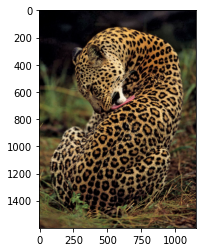

In [18]:
makePrediction(model, 'https://cdn.britannica.com/30/136130-050-3370E37A/Leopard.jpg')


Prediction 1 : watch, Score: 91.32391810417175%
Prediction 2 : camera, Score: 5.52484355866909%
Prediction 3 : airplanes, Score: 1.4270397834479809%


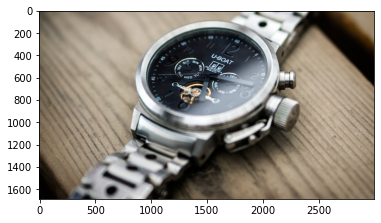

In [19]:
makePrediction(model, 'https://images.pexels.com/photos/164641/pexels-photo-164641.jpeg?cs=srgb&dl=silver-link-bracelet-black-u-boat-chronograph-watch-164641.jpg&fm=jpg')


In [20]:
!tar -czf model.tar.gz model_0.pth
